# Table of Contents:

1. [Section 1: Basic scenario creation and input](#section1)
2. [Section 2: Multiple technologies and demands](#section2)
3. [Section 3: Using real world data, advanced features and export formats](#section3)

<a id='section1'></a>
# Basic scenario creation and input

In this chapter we will cover how to make inputs and run the model in basic terms.  The Scenario Class: is a cornerstone of the model, serving as a structure to define different energy scenarios and in turn to use them as input. This class consists of demand profile, technologies and other several constants which will guide how the model will run. The scenario can be created in two ways, either using YAML format or hardcoding it in user_input.py file. It is recommended to use YAML, as there is less chance to make a mistake, but both options will be covered. 

## Problem statement
Assume you have a constant demand of electricity of 100 MW per hour. There will be 24*30=720 time units corresponding to electricity production of one month. To generate this electiricty we will have a wind power plant with CAPEX of 1 200 000 EUR / MW, expected capital return of 6% per annum or 0.5% per month and fixed cost of 1 200 EUR / MW for the one month period (if you would like to extend simulation for a year, 24 * 365= 8760, fixed cost and capital return per month should be multiplied by 12). Assume the wind power plant generates electricity at constant rate, thus having avaliblity factor constant avalibility factor of 0.8. What will be the required capacity generation capacity of this power plant and what will be the total cost?

Let's go to chapter 5 in manual and find the required classes for this problem which are: Demand and Wind Power Plant <br>

**Demand:**
- $D_{elec,t}$:  Base demand of electricity at time \(t\) (does not account for heat or \(H_2\) production) [e.g. \(MWh_e\)]
- $D_{heat,t}$: Demand of heat at time \(t\) [e.g. \(MWh_{th}\)]
- $D_{H2,t}$: Demand of hydrogen at time \(t\) [e.g. \(kg~H_2\)]
<br>

**Wind Power Plant:**
- $CAPEX_{G,i}$: Capital expenditures per installed generation capacity for wind technology $i$ [e.g. EUR/MW_e]
- $R_i$: Expected capital return of wind technology $i$ [decimal number]
- $FC_{G,i}$: Fixed costs per installed generation capacity for wind technology $i$ [e.g. EUR/MW_e]
- $VC_{G,i}$: Variable costs per unit of electricity for wind technology $i$ [e.g. EUR/MWh_e]
- $AF_{it}$: Availability factor of wind technology $i$ at time $t$ [$\in [0,1]$]
- $C_{Gmin,i}$: Minimum required capacity of wind technology $i$ [e.g. MW_e]
- $C_{Gmax,i}$: Maximum capacity potential of wind technology $i$ [e.g. MW_e]
<br>

**Scenario:**
- $nSmpl$: Represents the number of time steps throughout the simulation. The model assumes that one time step equals to one hour. However, the model can be in principal run with different time steps but this requires revision of technology constraints (e.g. electrolyzer capacity constraints). 
- $LHV_{H2}$: Denotes the lower heating value of hydrogen.
- $name$: Specifies the name assigned to the scenario.
<br>

Let's fill them with correcpondin value. 
<br>

**Demand:**
- $D_{elec,t}$:  100
- $D_{heat,t}$: 0 In this scenario we there is no demand for heat and hudrogen, thus they stay are set to 0
- $D_{H2,t}$: 0
<br>

**Wind Power Plant:**
- $CAPEX_{G,i}$: 1200000
- $R_i$: 0.005
- $FC_{G,i}$: 1200
- $VC_{G,i}$: 0 Variable costs here is 0, as wind energy is essentially free.
- $AF_{it}$: 0.8 for the entierty of run
- $C_{Gmin,i}$: 0, there is no lower and upper limit on thechnology capacity
- $C_{Gmax,i}$: infinity
<br>

**Scenario:**
- $nSmpl$: 720
- $LHV_H2$: 0.0333, however this value will not be used in the simulation
- $name$: My First Scenario

Now we have formulated the problem and ready to add it as an input to the model. 

## As YAML 
YAML format and it's appllication for scenario creation is in details chapter 6.2 of the manual. Here will be presented an example how to use it.
 Parameters in the manual closely resemble the constants which should be set in objects and technologies. If you not sure how to write the specific constant when transforming to YAML, open the place where the class is defined and look up the variable name.
<br> 

Open directory /python/yaml_files/ in the project folder and create there file named "basic_scenario.yaml" and begin defining the scenario module by module.
<br> 
Let's first format Demand in YAML.
```yaml
demand:
  D_Elec:
    get_value_mode: "Const"
    value: 100
```
Here we set the mode to "Const" and the value of 100, which will result in demand for electricity for 100 MW during all time frames. 
<br>
Now we will add our technologies list, which we contain just wind power plant. Also add any name to the technology. C_Gmin and C_Gmax are not necessary to add, as they have default values of 0 and Infinity accordingly. Avalibility factor creation is similar to demand values generation, use AF_config attribute for this. 
```yaml
technologies:
  WindPowerPlant:
    type: "technologies.powerPlants.WindPower"
    CAPEX_G: 1200000
    R: 0.005
    FC_G: 1200
    VC_G: 0
    name: "Wind Power plant 1"
    AF_config:
        get_value_mode: "Const"
        value: 0.8
```

And for scenario 

```yaml
Scenario:
  nSmpl: 720
  LHV_H2: 0.0333
  name: "My First Scenario"
```

The final contents of the file "basic_scenario.yaml" will look as follows. Remember the correct identation, technologies and demand are indented under scenario. Two spaces are used for each indentation level.

```yaml
Scenario:
  name: "My First Scenario"
  nSmpl: 720
  LHV_H2: 0.0333
  demand:
    D_Elec:
      get_value_mode: "Const"
      value: 100
  technologies:
    WindPowerPlant:
      type: "technologies.powerPlants.Wind"
      CAPEX_G: 1200000
      R: 0.005
      FC_G: 1200
      VC_G: 0
      name: "Wind Power plant 1"
      AF_config:
        get_value_mode: "Const"
        value: 0.8
```

You can run the following Jupyter frame to create the file with all it's contents.

In [ ]:

# Define the YAML content
yaml_content = """
Scenario:
  name: "My First Scenario"
  nSmpl: 720
  LHV_H2: 0.0333
  demand:
    D_Elec:
      get_value_mode: "Const"
      value: 100
  technologies:
    WindPowerPlant:
      type: "technologies.powerPlants.WindPower"
      CAPEX_G: 1200000
      R: 0.005
      FC_G: 1200
      VC_G: 0
      name: "Wind Power plant 1"
      AF_config:
        get_value_mode: "Const"
        value: 0.8
"""

# Specify the path and name for the YAML file
file_path = "yaml_files/basic_scenario.yaml"

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(yaml_content)

print(f"YAML file saved to: {file_path}")


Now let's run the scenario. In /python open file main.py, set the correct file to run
```python
YAML_to_RUN = '/yaml_files/basic_scenario.yaml'
```
check that you are using YAML mode
```python
YAML_mode = True
```
And run the file in command terminal using 
```bash
python main.py
```
If you are using Spyder you can just press F5 or press green arrow when main.py is open in editor.

Run the next frame to run the scenario here in Jupyter

In [ ]:
import main 


main.YAML_to_RUN = 'yaml_files/basic_scenario.yaml'
main.YAML_mode = True
main.main_function()

Yay, now you've got your first scenario executed. Let's interpreted results. First you have an error, ignore it.
This is followed by 
```
---Required generation capacity:
Wind Power plant 1 = 125.0
```
This answers to the quiestion how much generation capacity is required for the wind power plant. Then there is
```
---Objective value =  15625.0
```
This tells the final cost. The problem is solved! Also, you can see graph as a result, it is not very interesting right now, the only thing you can see there is that our wind power plant generate exactly the demanded ammount of electricity, which is 100. Also you can see that it is the only generation plant there.
<br>

Notice that in a YAML file you can define multiple scenarios.

## As hardcoding

Now we will convert our problem statement into hardcoded version of scenario. First open file user_input.py and before the last line with a variable "scenariosToRun" start to define the scenario as follows
```python
# Instantiate the Demand object
demand = Demand()

# Create the scenario
my_scenario = Scenario(techList=[], demand=demand, scenarioName="My First Scenario", nSmpl=12, LHV_H2=0.0333)

# Set demand values for the scenario
my_scenario.demand.setDemand('D_Elec', my_scenario.hourlyProfile(value=100, mode="Const"))
my_scenario.demand.setDemand('D_Heat', my_scenario.hourlyProfile(value=0, mode="Const"))
my_scenario.demand.setDemand('D_H2', my_scenario.hourlyProfile(value=0, mode="Const"))

# Append WindPowerPlant technology to the technology list of the scenario
my_scenario.techList.append(pp.WindPower(
    CAPEX_G=50, 
    R=1.1, 
    FC_G=70, 
    VC_G=0, 
    name="Wind Power plant 1", 
    AF=my_scenario.hourlyProfile(value=0.8, mode="Const")
))

# The scenario is now fully configured with demand and technologies.

```
Next add my_scenario to the list of scenarios to run
```python
scenariosToRun = [my_scenario]
```
Now in main.py disable YAML mode and run the file.
```python
YAML_mode = False
```
Run the next frame to run the hardcoded scenario in Jupyter. Don't try to copy contents of the frame to user_input.py, it will crash.

In [ ]:
import user_input as ui
from scenario import Demand, Scenario
import technologies.powerPlants as pp
import main
ui.demand = Demand()

# Create the scenario
ui.my_scenario = Scenario(techList=[], demand=ui.demand, scenarioName="My First Scenario", nSmpl=720, LHV_H2=0.0333)

# Set demand values for the scenario
ui.my_scenario.demand.setDemand('D_Elec', ui.my_scenario.hourlyProfile(value=100, mode="Const"))

# Append WindPowerPlant technology to the technology list of the scenario
ui.my_scenario.techList.append(pp.WindPower(
    CAPEX_G=1200000, 
    R=0.005, 
    FC_G=1200, 
    VC_G=0, 
    name="Wind Power plant 1", 
    AF=ui.my_scenario.hourlyProfile(value=0.8, mode="Const")
))

ui.scenariosToRun = [ui.my_scenario]


###Now the main part 
main.YAML_mode = False
main.main_function()

<a id='section2'></a>
# Multiple Technologies and Demands

After having set the stage with a basic example, we now dive into a more intricate scenario. This scenario extends our system to incorporate multiple power plants, adding to it a battery system for electricity storage, and an electrolyzer setup for hydrogen production. Instead of constant demand profiles and availability factors, we introduce dynamic patterns that vary with time. Some technologies will also now be characterized by bounds on their capacity. After inputing and running the model, the results from graphs will be analyzed thoroughly.

## Problem Formulation

Consider an energy system that operates over a month in 24 * 30=720 timeframes, like in a previous example.

**Assumptions and System Characteristics**:
1. The energy system incorporates three distinct power plants, each with its unique set of attributes.
  - Nuclear powerplant, which electricity generation can be adjusted, between 0% and 94% at rate 5% / hour . It has CAPEX of 1 600 000 EUR / MW, expected capital return 0.4% per month and fixed cost of 1 800 EUR / MW for the one month period. This plant already has capacity of 20 MWh installed and can be only upscaled from this. The fuel cost it is 9 EUR / MW
  - Offshore wind powerplant, which is very similar to the one used in a first example with CAPEX of 1 100 000 EUR / MW, expected capital return 0.5% and fixed cost of 1 200 EUR / MW per month, the efficiency will stay the same 0.8. However, it is predicted that the wind will be most powerful in the middle of the month, gradually decreasing it's power towards the begging and the end. 
  - Solar powerplant, which is an affordable electricity source, but limited by ammount of land. It has  CAPEX of 600 000 EUR / MW, expected capital return 0.5% and fixed cost of 400 EUR / MW per month. The efficiency will stay the same 0.8 and it's avalibilty factor will flactuate during the day using sine function for simplicity. Due to limited ammount of land only 30 MW can be installed maximum. 
2. There is an electricity storage system (a battery) that can store surplus electricity and provide it when there's a deficit. The batteries itself have CAPEX_S of 320 000 EUR / MW, capital return of 0.12% and fixed cost of 500 per month. For the power componnent of the accumulator like chargers and inverters the CAPEX_G is 240 000 EUR / MW with capital return of 0.12% and fixed cost of 400 per month. It has the follwoing limitations: loses for charge and discharge stands at 0.927; self discharge is 7.1 * 10^-5 and depth of discharge stands at 0.8.
3. An electrolyzer setup exists that can produce hydrogen. This setup consumes electricity and outputs hydrogen. The electrolyzer is of AWE type and has CAPEX of 500 000 EUR / MW, capital return of 0.01 and fixed cost of 10200 EUR / MW per month and electrical efficiency of 0.67. In this example we will not care about electrolyzer ramp up and ramp down speed, niether about variable cost.
4. The demand for the system is twofold: electricity and hydrogen. The electricity demand will follow cosine function peaking 100 MW. The hydrogen supply will be constant at 30 kg per hour.

Let's now prepare our definitions of scenario and technoliges using chapter 5 of the manual as template. 

**Demand:**
- $D_{elec,t}$: Electricity demand follows a rising pattern across the month, starting from 0 MW at the beginning, and peaking at 100 MW by the end.
- $D_{heat,t}$: 0 (There's no demand for heat in this scenario).
- $D_{H2,t}$: 30 kg/hour. Hydrogen demand is constant throughout the month.

**Nuclear Power Plant (NPP):**
- $CAPEX_{G,i}$: 1,400,000 EUR/MW
- $R_i$: 0.004
- $FC_{G,i}$: 1,600 EUR/MW per month
- $VC_{G,i}$: 9 EUR/MWh
- $RampU_{i}$: 0.05
- $RampD_{i}$: 0.05
- $AF_{max}$: 0.94
- $AF_{it}$: 0
- $C_{Gmin,i}$: 20 MWh


**Offshore Wind Power Plant:**
- $CAPEX_{G,i}$: 1,200,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 1,200 EUR/MW per month
- $VC_{G,i}$: 0 EUR/MWh (Wind energy is essentially free).
- $AF_{it}$: Varies. Highest in the middle of the month, gradually decreasing towards the beginning and end.


**Solar Power Plant:**
- $CAPEX_{G,i}$: 600,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 400 EUR/MW per month
- $VC_{G,i}$: 0 EUR/MWh (Solar energy is essentially free).
- $AF_{it}$: Fluctuates using a sine function representing daily patterns.
- $C_{Gmax,i}$: 30 MW

**Battery System:**
- $CAPEX_{S,i}$: 320,000 EUR/MW (for storage component)
- $CAPEX_{G,i}$: 240,000 EUR/MW (for power component like chargers and inverters)
- $R_i$: 0.0012
- $FC_{S,i}$: 6,400 EUR per month (for storage component)
- $FC_{G,i}$: 5,000 EUR per month (for power component)
- $\eta_{Discharge,i}$: 0.927 
- $\eta_{Charge,i}$: 0.927 
- $\eta_{SelfDischarge,i}$: 0.000071
- $DOD$: 0.8.

**Electrolyzer (AWE Type):**
- $CAPEX_{G,i}$: 500,000 EUR/MW
- $R_i$: 0.01
- $FC_{G,i}$: 10,200 EUR/MW per month
- $VC_{G,i}$: 0
- $RampU_{i}$: 1
- $RampD_{i}$: 1
- $\eta_{elec,i}$: 0.67

**Scenario:**
- $nSmpl$: 720
- $LHV_{H2}$:0.0333
- $name$: Advanced Energy Mix Scenario.
Having detailed our system's attributes, we can proceed with a simulation. First, we'll input these parameters using a YAML format, followed by a hardcoding approach. On completing the simulations, we'll carry out analysis of the results of this energy system.


## As YAML 

Let's start by formatting the **Demand** in YAML:

```yaml
  demand:
    D_Elec:
      get_value_mode: "Cos"
      value: 100
    D_H2:
      get_value_mode: "Const"
      value: 30
```

Next, let's format the **Nuclear Power Plant (NPP)** in YAML:

```yaml
    NuclearPowerPlant:
      type: "technologies.powerPlants.Nuclear"
      CAPEX_G: 1600000
      R: 0.004
      FC_G: 1800
      VC_G: 9
      RampU: 0.05
      RampD: 0.05
      AF_max: 0.94
      AF_min: 0
      C_Gmin: 20
      name: "Nuclear power plant"
```

For the **Offshore Wind Power Plant**:

```yaml
    OffshoreWindPowerPlant:
      type: "technologies.powerPlants.WindPower"
      CAPEX_G: 1100000
      R: 0.005
      FC_G: 1200
      VC_G: 0
      name: "Offshore Wind power plant"
      AF_config:
        get_value_mode: "Arch"
        value: 0.8
```

For the **Solar Power Plant**:

```yaml
    SolarPowerPlant:
      type: "technologies.powerPlants.SolarPower"
      CAPEX_G: 600000
      R: 0.005
      FC_G: 400
      VC_G: 0
      name: "Solar power plant"
      AF_config:
        get_value_mode: "Sin"
        value: 0.8
      C_Gmax: 30
```

For the **Battery System**:

```yaml
    BatterySystem:
      type: "technologies.storage.Battery"
      CAPEX_S: 320000
      CAPEX_G: 240000
      R: 0.0012
      FC_S: 500
      FC_G: 400
      eta_discharge: 0.927
      eta_charge: 0.927
      eta_selfDischarge: 0.000071
      DOD: 0.8
      name: "Battery 1"
```

For the **Electrolyzer (AWE Type)**:

```yaml
    Electrolyzer:
      type: "technologies.electrolyzer.AWE"
      CAPEX_G: 500000
      R: 0.01
      FC_G: 900
      VC_G: 0
      RampU: 1
      RampD: 1
      eta_elec: 0.67
      name: "AWE electrolyzer"
```

And finally, for the **Scenario**:

```yaml
Scenario:
  name: "Advanced Energy Mix Scenario"
  nSmpl: 720
  LHV_H2: 0.0333
  demand:
    D_Elec:
      get_value_mode: "Cos"
      value: 100
    D_H2:
      get_value_mode: "Const"
      value: 30
  technologies:
    NuclearPowerPlant:
      type: "technologies.powerPlants.Nuclear"
      CAPEX_G: 1600000
      R: 0.004
      FC_G: 1800
      VC_G: 9
      RampU: 0.05
      RampD: 0.05
      AF_max: 0.94
      AF_min: 0
      C_Gmin: 20
      name: "Nuclear power plant"
    OffshoreWindPowerPlant:
      type: "technologies.powerPlants.WindPower"
      CAPEX_G: 1100000
      R: 0.005
      FC_G: 1200
      VC_G: 0
      name: "Offshore Wind power plant"
      AF_config:
        get_value_mode: "Arch"
        value: 0.8
    SolarPowerPlant:
      type: "technologies.powerPlants.SolarPower"
      CAPEX_G: 600000
      R: 0.005
      FC_G: 400
      VC_G: 0
      name: "Solar power plant"
      AF_config:
        get_value_mode: "Sin"
        value: 0.8
      C_Gmax: 30
    BatterySystem:
      type: "technologies.storage.Battery"
      CAPEX_S: 320000
      CAPEX_G: 240000
      R: 0.0012
      FC_S: 500
      FC_G: 400
      eta_discharge: 0.927
      eta_charge: 0.927
      eta_selfDischarge: 0.000071
      DOD: 0.8
      name: "Battery 1"
    Electrolyzer:
      type: "technologies.electrolyzer.AWE"
      CAPEX_G: 500000
      R: 0.01
      FC_G: 900
      VC_G: 0
      RampU: 1
      RampD: 1
      eta_elec: 0.67
      name: "AWE electrolyzer"

```

Save these configurations into a single YAML file named "advanced_energy_mix.yaml" in "yaml_files" folder to be used for the simulation and run as described in the first exampl. Ensure correct indentation using two spaces per indentation level.
<br>

Run the next frame to run this scenario in jupyter. 


In [ ]:
import main 


main.YAML_to_RUN = 'yaml_files/example2.yaml'
main.YAML_mode = True
main.main_function()

You might have noticed that the plots do not include plots on hydrogen production. To visualize these, go to the function plotScenario in visualizer.py and uncomment the lines including hydrogen. You can also create plots of your own or modify the existing plots in visualizer. plotting_task should look like this now: 
```python
plotting_tasks = [
        {"func": plot_combined_electricity, "x": x, "coordinates": (0, 0)},
        {"func": plot_stacked_electricity, "x": x, "coordinates": (1, 0)},
        {"func": plot_battery_level, "x": x1, "coordinates": (2, 0)},
        {"func": plot_stacked_hydrogen_prod, "x": x, "coordinates": (0, 1)},
        {"func": plot_hydrogen_demand_supply, "x": x, "coordinates": (1, 1)},
        {"func": plot_H2_storage_level, "x": x1, "coordinates": (2, 1)},
        #{"func": plot_heat_demand_supply, "x": x, "coordinates": (0, 2)},
        # Add more plotting functions if needed
    ]
```
Run the model again to see more detailed report. 

The scenario is not very realistic, especially from demand side, but such extreme case gives us clear view how the system responds to fluctuations. 
- On the first Graph you can see that most of the electricity is consumed by base demand and only a small portion goes to electrolyzer for hydrogen production to meet the constant demand of 30 kg per hour, as can be seen on the second graph. 
- On the third graph you can see in details how powerplants and batteries contribute to overall elecricity supply. 
- Fourth graph should do the same thing as previous, but for hydrogen, though, it is not very informative, as there is only one electrolyzer and no hydrogen sotrages. 
- On a fifth graph battery levels can be seen, which shows how model uses the batteries to manage dynamic envirnment with spikes and lows in production and demand. 

## As Hardcoding

Here is the same scenario converted to hardcoded version. You can run the same way, as other hardcoded scenario. The scenario is readily avaliable in user_input.py file.
```python

# Importing necessary modules/classes. Assume necessary modules are available as 'technologies'.


# Instantiate the Demand object
demand = Demand()

# Define the scenario
advanced_energy_scenario = Scenario(
    techList=[], 
    demand=demand, 
    scenarioName="Advanced Energy Mix Scenario", 
    nSmpl=720, 
    LHV_H2=0.0333
)

# Setting demand values
advanced_energy_scenario.demand.setDemand('D_Elec', advanced_energy_scenario.hourlyProfile(value=100, mode="Cos"))
advanced_energy_scenario.demand.setDemand('D_H2', advanced_energy_scenario.hourlyProfile(value=30, mode="Const"))

# Adding Nuclear Power Plant
advanced_energy_scenario.techList.append(powerPlants.Nuclear(
    CAPEX_G=1600000, 
    R=0.004, 
    FC_G=1800, 
    VC_G=9, 
    RampU=0.05,
    RampD=0.05,
    AF_max=0.94,
    AF_min=0,
    C_Gmin=20,
    name="Nuclear power plant"
))

# Adding Offshore Wind Power Plant
advanced_energy_scenario.techList.append(powerPlants.WindPower(
    CAPEX_G=1100000,
    R=0.005,
    FC_G=1200,
    VC_G=0,
    name="Offshore Wind power plant",
    AF=advanced_energy_scenario.hourlyProfile(value=0.8, mode="Arch")
))

# Adding Solar Power Plant
advanced_energy_scenario.techList.append(powerPlants.SolarPower(
    CAPEX_G=600000,
    R=0.005,
    FC_G=400,
    VC_G=0,
    name="Solar power plant",
    AF=advanced_energy_scenario.hourlyProfile(value=0.8, mode="Sin"),
    C_Gmax=30
))

# Adding Battery System
advanced_energy_scenario.techList.append(storage.Battery(
    CAPEX_S=320000,
    CAPEX_G=240000,
    R=0.0012,
    FC_S=500,
    FC_G=400,
    eta_discharge=0.927,
    eta_charge=0.927,
    eta_selfDischarge=0.000071,
    DOD=0.8,
    name="Battery 1"
))

# Adding Electrolyzer (AWE Type)
advanced_energy_scenario.techList.append(electrolyzer.AWE(
    CAPEX_G=500000,
    R=0.01,
    FC_G=900,
    VC_G=0,
    RampU=1,
    RampD=1,
    eta_elec=0.67,
    name="AWE electrolyzer"
))

# Append the configured scenario to the list of scenarios to run
scenariosToRun = [advanced_energy_scenario]
```


<a id='section3'></a>
# Using real world data, advanced features and export formats

In this chapter usage of exteranal data files and other advanced features like iterating the same scenario with different values and output modes will be discussed. 

Here we will use more advance scenario with real world data, using as before various electricity supply sources. There will be real world demand for electricity and hydrogen. The scenario will be iterated multiple times to see how change of some values can affect final technology mix. The iterations will result in a big ammount of output data and to make it slimmer we will discuss the output tools and modes of this model.

## Problem Formulation
Here we won't go again into extracting data from a problem statement, as the process should be familiar, but go straight to definition of system characteristics. 

Here's the translated definition from the hardcoded scenario:

### Scenario Description

There are 3 scenarios created in a loop. Each scenario has slight differences in terms of CAPEX for the nuclear power plant.

**Scenario Attributes:**
- $nSmpl$: 720
- $LHV_{H2}$: 0.0333
- $name$: Scenario Example 3 [iter 1, iter 2,iter 3] (changes based on iteration).

**Demand:**
- $D_{elec,t}$: Electricity demand is taken from an external file 'electricityDemand_FI.xlsx' from column "E".
- $D_{H2,t}$: Hydrogen demand is constant at 17,000 kg/hour throughout the period.

**Wind Power (Wind1):**
- $CAPEX_{G,i}$: 1,200,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 1,200 EUR/MW per month
- $AF_{it}$: Real-world availability factors from 'data/wind_FI.csv' col=2, start_row=2.

**Solar Power (Solar1):**
- $CAPEX_{G,i}$: 750,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 880 EUR/MW per month
- $C_{Gmax,i}$: 1,000 MW
- $C_{Gmin,i}$: 100 MW
- $AF_{it}$: Real-world availability factors from 'solar_FI.xlsx' column "B" in sheet "Ark1".

**Nuclear Power (changes per iteration):**
- $CAPEX_{G,i}$: [2,500,000 ; 3,000,000 ; 3,500,000] EUR/MW (changes based on iteration)
- $R_i$: 0.006
- $FC_{G,i}$: 5,000 EUR/MW per month
- $VC_{G,i}$: 10 EUR/MWh
- $RampU_{i}$: 0.4
- $RampD_{i}$: 0.4
- $AF_{max}$: 0.94
- $AF_{min}$: 0

**Gas Turbine (GasTurbine):**
- $CAPEX_{G,i}$: 1,100,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 1,000 EUR/MW per month
- $\eta_{turbine,i}$: 0.45

**Hydro Power (Hydro):**
- $CAPEX_{G,i}$: 1,300,000 EUR/MW
- $CAPEX_{S,i}$: 220,000 EUR/MW
- $R_i$: 0.005
- $FC_{G,i}$: 1,000 EUR/MW per month
- $FC_{S,i}$: 900 EUR per month
- $Inflow_{it}$: Real-world inflow rates from 'hydro_FI.xlsx' column "B".
- $Outflow_{min,i}$: 200
- $C_{Gmax,i}$: 3,300 MW

**Electrolyzer (AWE):**
- $CAPEX_{G,i}$: 900,000 EUR/MW
- $R_i$: 0.006
- $FC_{G,i}$: 900 EUR/MW per month
- $RampU_{i}$: 1
- $RampD_{i}$: 1
- $\eta_{elec,i}$: 0.70

**Battery System:**
- $CAPEX_{S,i}$: 280,000 EUR/MW (for storage component)
- $CAPEX_{G,i}$: 250,000 EUR/MW (for power component)
- $R_i$: 0.007
- $FC_{S,i}$: 250 EUR per month (for storage component)
- $FC_{G,i}$: 250 EUR/MW per month (for power component)
- $\eta_{Discharge,i}$: 0.90 
- $\eta_{Charge,i}$: 0.90 
- $\eta_{SelfDischarge,i}$: 0.0001
- $DOD$: 0.8

**Hydrogen Storage (H2Storage):**
- $CAPEX_{S,i}$: 50 EUR/MW (for storage component)
- $CAPEX_{G,i}$: 5,000 EUR/MW (for power component)
- $R_i$: 0.005
- $FC_{S,i}$: 0.8 EUR per month (for storage component)
- $FC_{G,i}$: 80 EUR/MW per month (for power component)
- $\eta_{Discharge,i}$: 1 
- $\eta_{Charge,i}$: 1 
- $\eta_{SelfDischarge,i}$: 0
- $\alpha_{pump,i}$: 0.003


In the definitions you can see remarks that data is imported from .xlsx excel and .csv file. Right now there are two options to add extrenal files: excel and csv. Let's write the script for running the several iterations of the scenario using hardcoding. Right now there is no staraight forward way to do the same loop using YAML and if you would like to do the same loop there, you will have to resort to copypasting. 


```python
## Modelling Example 3

# setup
scenarioExample3 = []
demand = Demand()
for i in range(3):
    # add new scenario to list
    scenarioExample3.append( Scenario(techList =[], demand = demand, scenarioName = "Scenario Example 3 iter "+f"{i+1}", nSmpl=720, LHV_H2 = 0.0333) )
    
    # add demand profiles for electricity and hydrogen. Electricity demand is taken from external file
    scenarioExample3[i].demand.setDemand('D_Elec', scenarioExample3[i].readExcel('data/electricityDemand_FI.xlsx', "E"))
    scenarioExample3[i].demand.setDemand('D_H2', scenarioExample3[i].hourlyProfile(value = 17000)) 
    
    # add wind power with real world availability factors
    scenarioExample3[i].techList.append(pp.WindPower( CAPEX_G = 1200000, R = 0.005, FC_G = 1200, AF = scenarioExample3[i].readExcel("data/wind_FI.xlsx", "B"), name = "Wind1"))
    # add solar power with real world availability factors
    scenarioExample3[i].techList.append(pp.SolarPower( CAPEX_G = 750000, R= 0.005, FC_G = 880, C_Gmax = 1000, C_Gmin = 100, AF = scenarioExample3[i].readExcel("data/solar_FI.xlsx", "B", sheet_name="Ark1"), name= "Solar1"))
    # add nuclear power. CAPEX increases with every iteration
    scenarioExample3[i].techList.append(pp.Nuclear( CAPEX_G = 2500000 + 500000*i, R= 0.006, FC_G = 5000, VC_G=10, RampU= 0.4, RampD= 0.4, AF_min = 0, AF_max= 0.94, name= "Nuclear"))
    # add gas turbine using pure hydrogen
    scenarioExample3[i].techList.append(pp.GasTurbine( CAPEX_G = 1100000, R= 0.005, FC_G = 1000, eta_turbine = 0.45, name= "GasTurbine"))
    # add hydro power
    scenarioExample3[i].techList.append(pp.Hydro( CAPEX_G = 1300000, CAPEX_S = 220000, R= 0.005, FC_G = 1000, FC_S = 900, Inflow = scenarioExample3[i].readExcel("data/hydro_FI.xlsx", "B"), Outflow_min = 200, C_Gmax = 3300, name= "Hydro"))
    
    # add electrolyzer
    scenarioExample3[i].techList.append(elec.AWE(CAPEX_G = 900000, R = 0.006, FC_G = 900, RampU = 1, RampD = 1, eta_elec = 0.70,  name = "AWE"))
    
    # add electric battery and hydrogen storage
    scenarioExample3[i].techList.append(stor.Battery(CAPEX_G = 250000, CAPEX_S = 280000, R= 0.007, FC_G = 250, FC_S = 250, eta_charge = 0.90, eta_discharge = 0.90, eta_selfDischarge = 0.0001, DOD = 0.8, name = "Battery"))
    scenarioExample3[i].techList.append(stor.H2Storage(CAPEX_G = 5000, CAPEX_S = 50, R= 0.005, FC_G = 80,  FC_S = 0.8, eta_charge = 1, eta_discharge = 1, eta_selfDischarge = 0, alpha_pump = 0.003, name = "H2Storage"))

```

The scenario can be run in the similar way as any other hardcoded scenario. Just set scenariosToRun as follows and run main.py as usual. 
```python
scenariosToRun = scenarioExample3[0:]
```!

If after the second example you didn't commented back the functions for hydrogen plotting under plotting_tasks list, you should now get the following three graphs.

![plot 1.png](attachment:e50cca48-baba-4be5-8d99-9fb6e88a1f77.png)![plot 2.png](attachment:d4347259-8364-48b2-a77b-400037b0be04.png)![plot 3.png](attachment:78c9b77e-7a22-4984-b1a3-0ae027e994d6.png)

When running just one scenario full report is on a graph is useful, but as you can see, when running several iterations at once the graphs with all the subplots become overwhelming. Let's clear it out a bit to see the useful information. The Battery and Hydrogen storage subplots don't change very much, so let's remove them. Along with that the first and the second graph should go. So we left with third and fourth graph. To achieve this set plotting_tasks as follows:
```python
    plotting_tasks = [
        #{"func": plot_combined_electricity, "x": x, "coordinates": (0, 0)},
        {"func": plot_stacked_electricity, "x": x, "coordinates": (0, 0)},
        #{"func": plot_battery_level, "x": x1, "coordinates": (2, 0)},
        #{"func": plot_stacked_hydrogen_prod, "x": x, "coordinates": (0, 1)},
        {"func": plot_hydrogen_demand_supply, "x": x, "coordinates": (0, 1)},
        #{"func": plot_H2_storage_level, "x": x1, "coordinates": (2, 1)},
        #{"func": plot_heat_demand_supply, "x": x, "coordinates": (0, 2)},
        # Add more plotting functions if needed
    ]
```
Notice, that "coordinates also have been change to not leave blanck spots from the missing subplots. Now when you run the program again you will get the follwing graphs.
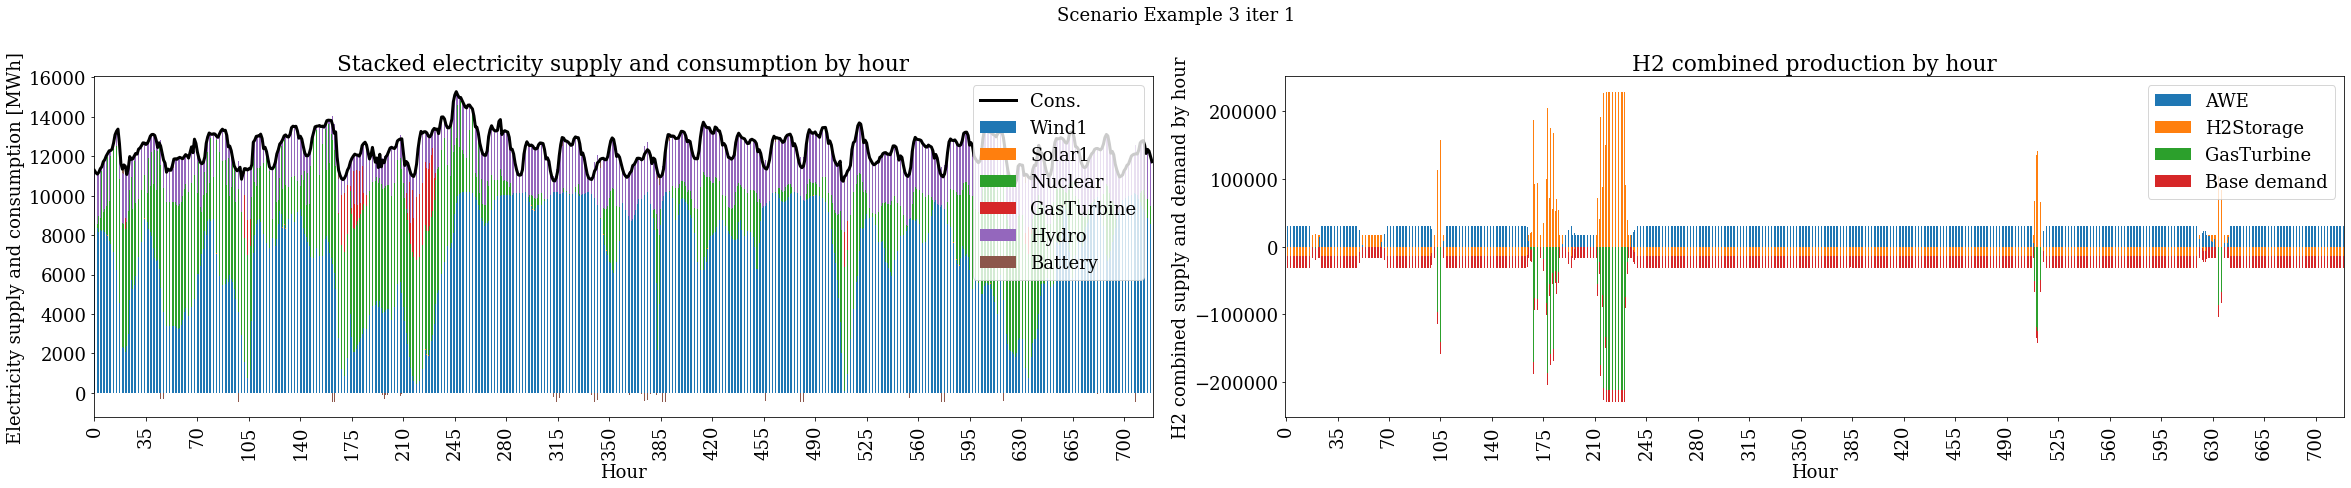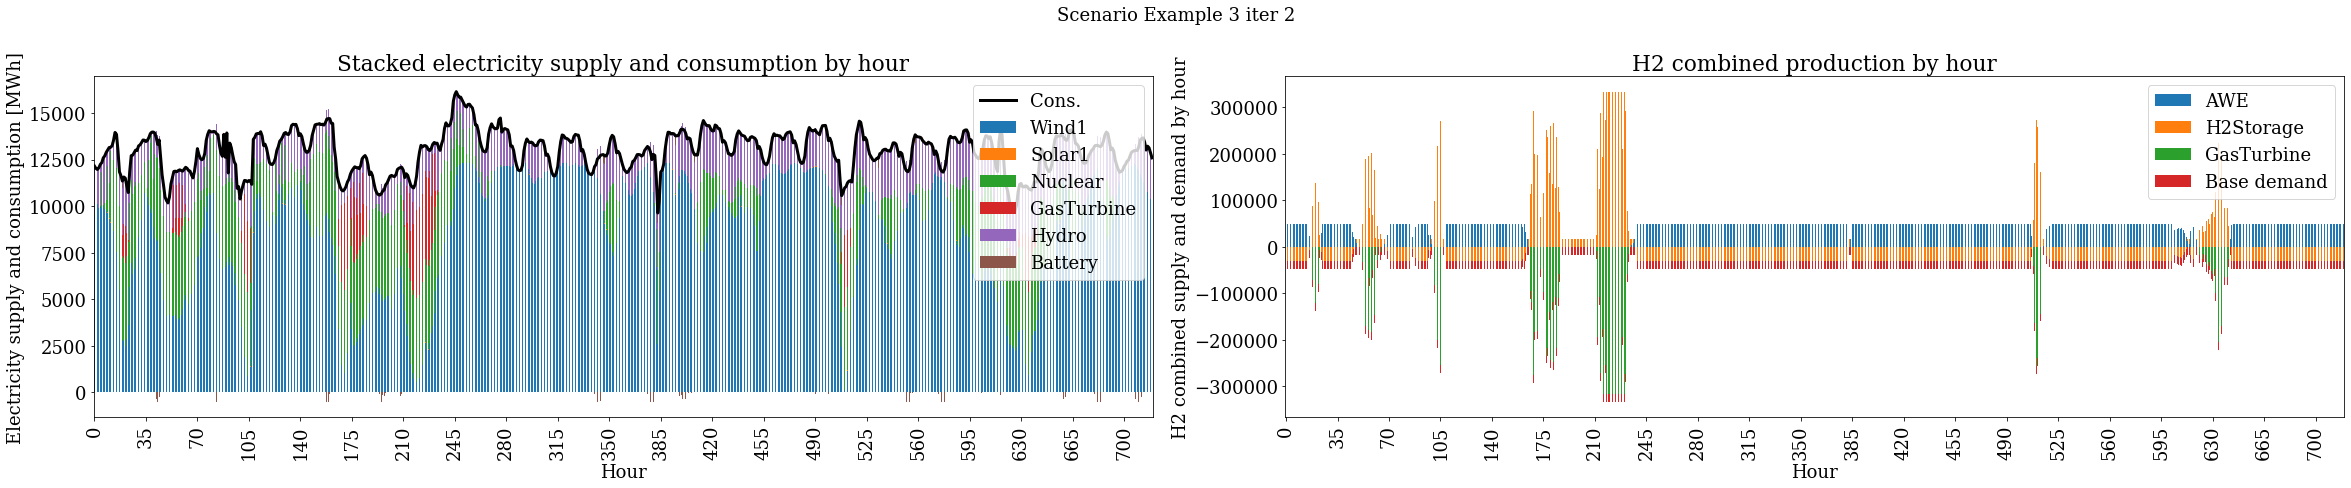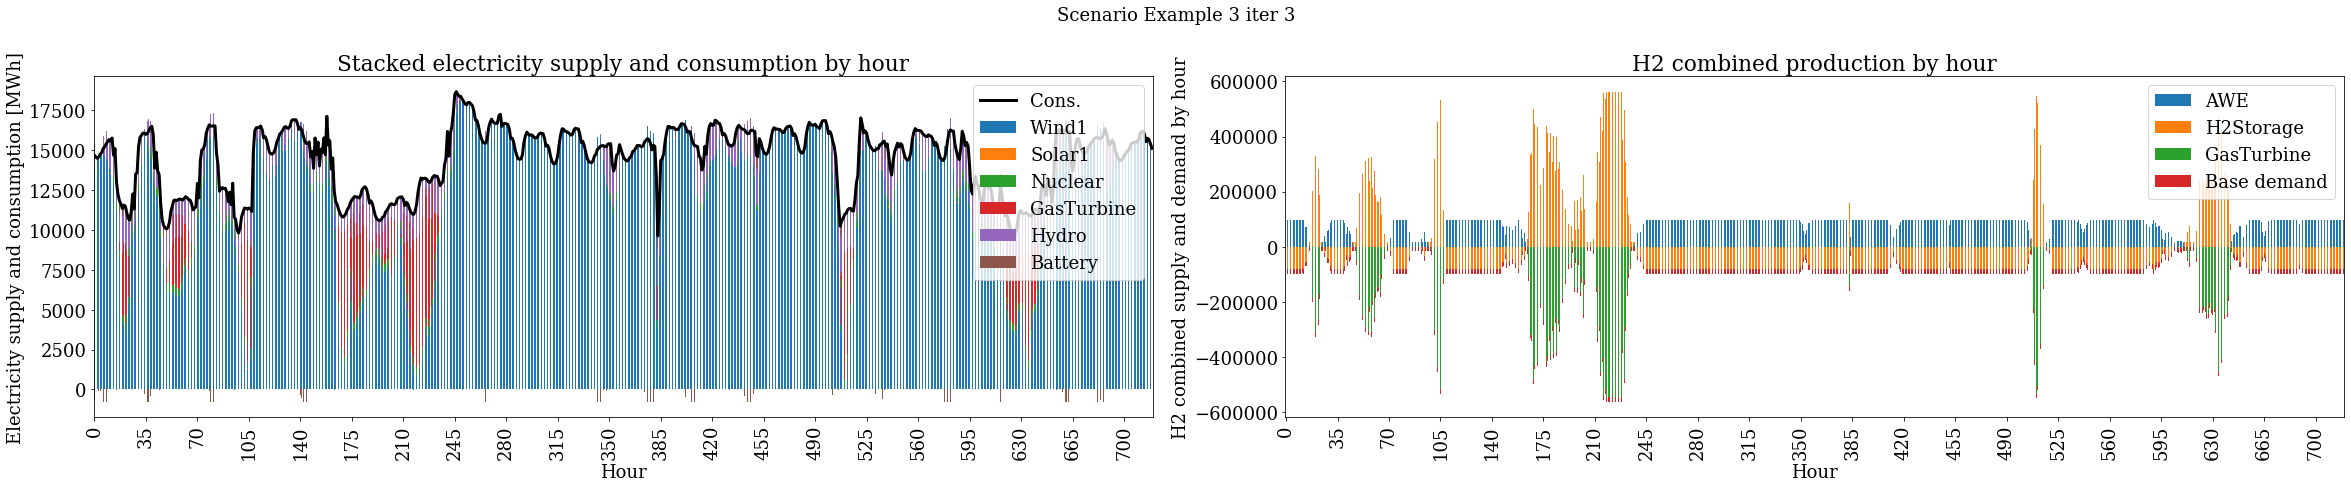

Now this is looks much more clear and we can interpret the results easier. On the graphs we can see that with the increase of CAPEX of nuclear power plant it's size in technology mix decreases from the main component to almost no existing. To compensate for the lost adjustable electricity production capacity the model uses more gas turbines, which result in increase of hydrogen production in periods prior to gas turbine active usage. 

Also the subplots can be generated as a separate graphs by changing mode of plotScenario from "subplot" to "separate" like this
```python
def plotScenario(model, demand, msg, mode="subplot"): 
```

Other option for output is a result export in csv format. After the scenario is ran it can be found in folder "results" in a file with scenario name .csv. This file includes more data than graphs and can be used with external data processing tools (like excel) to make custom reports. 